In [44]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords

"""
This is just going to make data to turn into audio.  sentence splitting can happen here i think.
"""

ModuleNotFoundError: No module named 'indexer'

In [49]:
cuss_words = [
    "fuck"
    ,"fucking"
    ,"ass"
    ,"bitch"
    ,"dick"
    ,"fag"
    ,"faggot"
    ,"nigger"
    ,"shit"
    ,"cunt"
    ,"whore"
    ,"cock"
    ,"pussy"
    ,"cocksucker"
    
]

In [23]:
stops = set(stopwords.words('english'))

{'t', 'o', 'aren', 'her', 'weren', 'this', 've', 'their', "hadn't", 'and', 'them', 'into', 'him', 'yourselves', 'now', 'itself', 'which', 'ours', 'when', 'or', 'very', "wasn't", 'you', 'how', 'more', 'each', 'from', 'are', 'all', 'will', 'm', 'these', 'those', 'they', 'no', 'here', 'i', 'a', 'yourself', 'while', 'our', 'hasn', "you'd", 'needn', 'before', 'what', 'did', 'yours', 'be', 'to', 'again', 'of', 'some', 'haven', 'my', 'out', 'couldn', "hasn't", 'then', 'not', 'on', "wouldn't", "doesn't", 'further', 'an', 'mustn', 'wasn', 'shouldn', 'ain', 'most', 'had', 'do', 'as', 'hadn', 'in', 'because', 'why', 'herself', "didn't", 'over', 'does', 'didn', 'by', 'he', 'it', 're', 'mightn', 'hers', 'ma', 'but', 'should', 'after', 'just', 'any', 'that', 'few', 'below', 'at', "haven't", 'shan', "won't", 'd', "weren't", 'with', 'against', 'there', "aren't", 'won', 'whom', 'only', 'your', 'his', 'above', 'under', "that'll", 'such', 'both', "needn't", 'nor', 'same', 'me', 'y', 'doesn', 'we', 'once'

In [4]:
data = pd.read_csv('dota2_chat_messages.csv')
data['text'] = data['text'].apply(str)
data['text'] = data['text'].apply(str.lower)

In [26]:
def maxscii(string):
    """
    returns true if the proportion of characters that are in [a-z] or [A-Z] are over cutoff
    """
    letter_ascii = [i for i in range(65,91)] + [i for i in range(97,123)]
    string_ascii = [ord(i) for i in str(string)]
    letter_list = [ 1 if i in letter_ascii else 0 for i in string_ascii]
    
    return float(sum(letter_list))/float(len(letter_list))

def space_ratio(string):
    str_string = str(string)
    return str_string.count(" ")/len(str_string)
    
def total_stop_words(string,stop_words):
    """
    count how many english stop words are present
    returns word level ratio
    """
    text_list = string.split(" ")
    stop_counts = len([i for i in text_list if i in stop_words])
    return stop_counts/len(text_list)
    

In [13]:
data['maxscii'] = data.apply(lambda x : maxscii(x['text']), axis =1) #proportion of letters in text
data['len'] = data.apply(lambda x : len(str(x['text'])), axis =1) #len in char
data['space_ratio'] = data.apply(lambda x: space_ratio(x['text']), axis = 1)
data['stop_percent'] = data.apply(lambda x : total_stop_words(x['text'],stops), axis = 1 )

<AxesSubplot:>

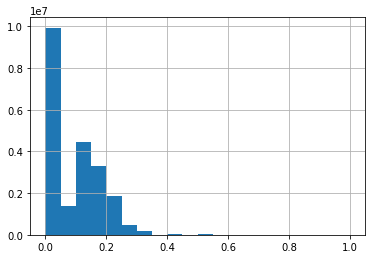

In [14]:
data["space_ratio"].hist(bins = 20)

<AxesSubplot:>

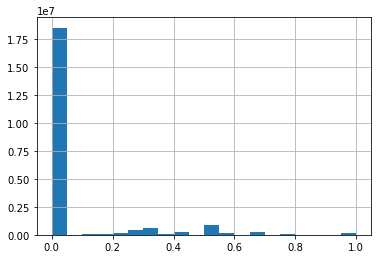

In [32]:
data["stop_percent"].hist(bins = 20)

<AxesSubplot:>

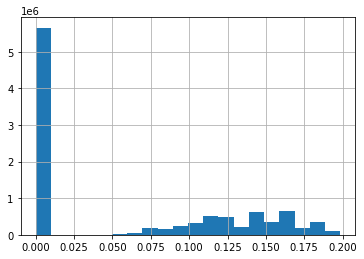

In [19]:
data.loc[data['maxscii'] > 0.8]['space_ratio'].hist(bins=20)

array([[<AxesSubplot:title={'center':'maxscii'}>,
        <AxesSubplot:title={'center':'len'}>]], dtype=object)

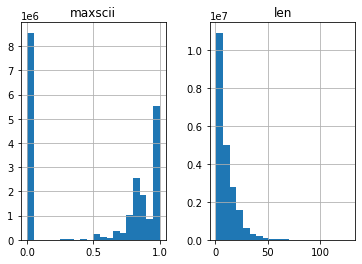

In [15]:
data[['maxscii','len']].hist(bins = 20) ## looks like above 0.8 will do nice

<AxesSubplot:xlabel='maxscii', ylabel='len'>

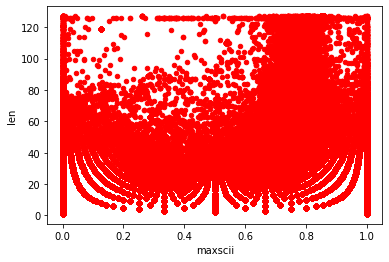

In [16]:
data.plot.scatter(x='maxscii',y='len',c='red')

In [40]:
good_data = data['text']
good_data = good_data.loc[data['maxscii']>0.8]
good_data = good_data.loc[data['len']>20]
good_data = good_data.loc[data['space_ratio']>0.05]
good_data = good_data.loc[data['stop_percent']>0.2] #0 was too low, was getting tagalog


In [89]:
tiny = good_data[0:1000]

In [96]:
word_split = [i.split(' ')[:-1] for i in tiny]

truth_table = [ [x  in cuss_words for x in i ] for i in word_split  ] ## all but last
final_idx = [[j for j,k in enumerate(i) if k] for i in truth_table]
[i for i in list(zip(word_split, final_idx)) if len(i[1]) > 0]

[(['yuou', 'just', 'fuck', 'your', 'ulti', 'as'], [2]),
 (['this', 'is', 'fucking'], [2]),
 (['fuck', 'you', 'for', 'playing'], [0]),
 (['support', 'my', 'ass'], [2]),
 (['let', 'the', 'faggot', 'be', 'happy', 'with', 'his', 'imba', 'hero'], [2]),
 (['are', 'fucking', 'retard'], [1]),
 (['where', 'the', 'fuck', 'is'], [2]),
 (['raport', 'this', 'shit'], [2]),
 (['spe', 'is', 'so', 'fucking', 'over'], [3]),
 (['gg', 'this', 'omni', 'watches', 'too', 'much', 'fucking'], [6]),
 (['get', 'off', 'my', 'dick'], [3]),
 (['fucking', 'trash', 'of'], [0]),
 (['fucking', 'pieces', 'of'], [0]),
 (['this', 'lineup', 'is', 'fucking'], [3]),
 (['why', 'you', 'play', 'whis', 'shit'], [4]),
 (['cannot', 'even', 'fucking', 'finish', 'a', 'game', 'already'], [2]),
 (['dude',
   'the',
   'other',
   'team',
   'doesnt',
   'wanna',
   'hear',
   'you',
   'be',
   'a',
   'little',
   'bitch'],
  [11]),
 (['cant', 'fuck', 'with'], [1]),
 (['i', 'commend', 'your', 'fucking'], [3]),
 (['we', 'w8ed', 'your'

In [ ]:
#needs spell check
def augment_with_non_final_cuss_words(df,cuss_words):
    """
    This is a data augmentation function that looks for cuss_words in the middle of the sentence, slices the sentence 
    and makes another sentence with a terminal position cussword. 
    """
    res_list = []
    
    